In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.shape

(26707, 34)

In [5]:
data.info

<bound method DataFrame.info of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

In [6]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# 1 Exploratory Data Analysis

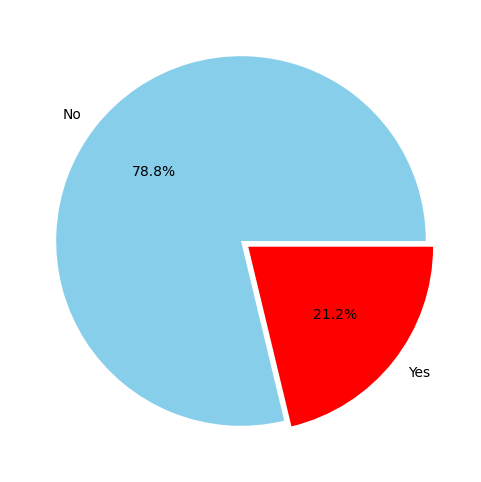

In [7]:
plt.figure(figsize=(11,6))
labels=['No','Yes']
explode=[.0,.05]
mycolors=['skyblue','red']
sizes=data['h1n1_vaccine'].value_counts().values

plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct='%1.1f%%')
plt.show()

**Based on my hipothysis h1n1_worry,h1n1_awareness,marital_status,avoid_large_gathergings,sex,race,qualification,income_level,no_of_children  are not necessary**

In [8]:
data_abc=data.select_dtypes(include=np.object_)
data_abc

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [9]:
data_abc.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [10]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
    data[i]=le.fit_transform(data[i])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [12]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [13]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

In [14]:
data['h1n1_worry'].fillna(data['h1n1_worry'].mode()[0],inplace=True)
data['h1n1_awareness'].fillna(data['h1n1_awareness'].mode()[0],inplace=True)
data['antiviral_medication'].fillna(data['antiviral_medication'].mode()[0],inplace=True)
data['contact_avoidance'].fillna(data['contact_avoidance'].mode()[0],inplace=True)
data['bought_face_mask'].fillna(data['bought_face_mask'].mode()[0],inplace=True)
data['wash_hands_frequently'].fillna(data['wash_hands_frequently'].mode()[0],inplace=True)
data['avoid_large_gatherings'].fillna(data['avoid_large_gatherings'].mode()[0],inplace=True)
data['wash_hands_frequently'].fillna(data['wash_hands_frequently'].mode()[0],inplace=True)
data['reduced_outside_home_cont'].fillna(data['reduced_outside_home_cont'].mode()[0],inplace=True)
data['avoid_touch_face'].fillna(data['avoid_touch_face'].mode()[0],inplace=True)
data['dr_recc_h1n1_vacc'].fillna(data['dr_recc_h1n1_vacc'].mode()[0],inplace=True)
data['dr_recc_seasonal_vacc'].fillna(data['dr_recc_seasonal_vacc'].mode()[0],inplace=True)
data['chronic_medic_condition'].fillna(data['chronic_medic_condition'].mode()[0],inplace=True)
data['cont_child_undr_6_mnths'].fillna(data['cont_child_undr_6_mnths'].mode()[0],inplace=True)
data['is_health_worker'].fillna(data['is_health_worker'].mode()[0],inplace=True)
data['has_health_insur'].fillna(data['has_health_insur'].mode()[0],inplace=True)
data['is_h1n1_vacc_effective'].fillna(data['is_h1n1_vacc_effective'].mode()[0],inplace=True)
data['is_h1n1_risky'].fillna(data['is_h1n1_risky'].mode()[0],inplace=True)
data['sick_from_h1n1_vacc'].fillna(data['sick_from_h1n1_vacc'].mode()[0],inplace=True)
data['no_of_adults'].fillna(data['no_of_adults'].mode()[0],inplace=True)
data['no_of_children'].fillna(data['no_of_children'].mode()[0],inplace=True)
data['is_seas_risky'].fillna(data['is_seas_risky'].mode()[0],inplace=True)
data['is_seas_vacc_effective'].fillna(data['is_seas_vacc_effective'].mode()[0],inplace=True)
data['sick_from_seas_vacc'].fillna(data['sick_from_seas_vacc'].mode()[0],inplace=True)

# checking our hypothesis with chi-square test

In [15]:
from sklearn.feature_selection import chi2
x1=data.drop('h1n1_vaccine',axis=1)
y1=data.h1n1_vaccine

In [16]:
f_score=chi2(x1,y1)

In [17]:
f_score

(array([1.27892347e+03, 2.01358892e+02, 1.11808117e+02, 4.11096977e+01,
        1.59504077e+01, 1.23284462e+02, 2.58568639e+01, 5.61483986e+00,
        8.64154522e+00, 4.30653783e+01, 3.30781019e+03, 8.92499456e+02,
        1.72886102e+02, 1.09342915e+02, 6.72405011e+02, 3.04643931e+00,
        4.95639893e+02, 1.91415123e+03, 1.15654361e+02, 2.43320341e+02,
        1.22231992e+03, 2.01581768e+00, 4.37694949e+01, 1.24151591e+01,
        1.49313640e+01, 6.77656778e+00, 5.19724564e+00, 4.50617033e+01,
        2.79256058e+01, 1.27635738e+01, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([4.30008095e-280, 1.05510630e-045, 3.93620890e-026, 1.43920477e-010,
        6.50237709e-005, 1.20823440e-028, 3.67694855e-007, 1.78090085e-002,
        3.28582623e-003, 5.29408499e-011, 0.00000000e+000, 4.19137320e-196,
        1.73317808e-039, 1.36504702e-025, 2.99632034e-148, 8.09143610e-002,
        8.44597327e-110, 0.00000000e+000, 5.65791678e-027, 7.42579815e-055,
        8.60189894

# chi-square(Test for independence)

**Null Hypoythesis: variables are independent on each other**

**Alternate Hypoyhesis:variables are dependent on each other**

**if p-value is <=0.05,then we can reject the null hypoyhesis or else we should accept the null hypothesis**

In [18]:
p_values=pd.Series(f_score[1],index=x1.columns)


In [19]:
irr_cols=[]

In [20]:
for x in p_values.index:
    if p_values[x]<=0.05:
        print(x,':- Reject the Null Hypothesis')
    else:
        print(x,':- Accept the Null Hypothesis')
        irr_cols.append(x)      

unique_id :- Reject the Null Hypothesis
h1n1_worry :- Reject the Null Hypothesis
h1n1_awareness :- Reject the Null Hypothesis
antiviral_medication :- Reject the Null Hypothesis
contact_avoidance :- Reject the Null Hypothesis
bought_face_mask :- Reject the Null Hypothesis
wash_hands_frequently :- Reject the Null Hypothesis
avoid_large_gatherings :- Reject the Null Hypothesis
reduced_outside_home_cont :- Reject the Null Hypothesis
avoid_touch_face :- Reject the Null Hypothesis
dr_recc_h1n1_vacc :- Reject the Null Hypothesis
dr_recc_seasonal_vacc :- Reject the Null Hypothesis
chronic_medic_condition :- Reject the Null Hypothesis
cont_child_undr_6_mnths :- Reject the Null Hypothesis
is_health_worker :- Reject the Null Hypothesis
has_health_insur :- Accept the Null Hypothesis
is_h1n1_vacc_effective :- Reject the Null Hypothesis
is_h1n1_risky :- Reject the Null Hypothesis
sick_from_h1n1_vacc :- Reject the Null Hypothesis
is_seas_vacc_effective :- Reject the Null Hypothesis
is_seas_risky :- R

In [21]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

<Axes: xlabel='wash_hands_frequently', ylabel='count'>

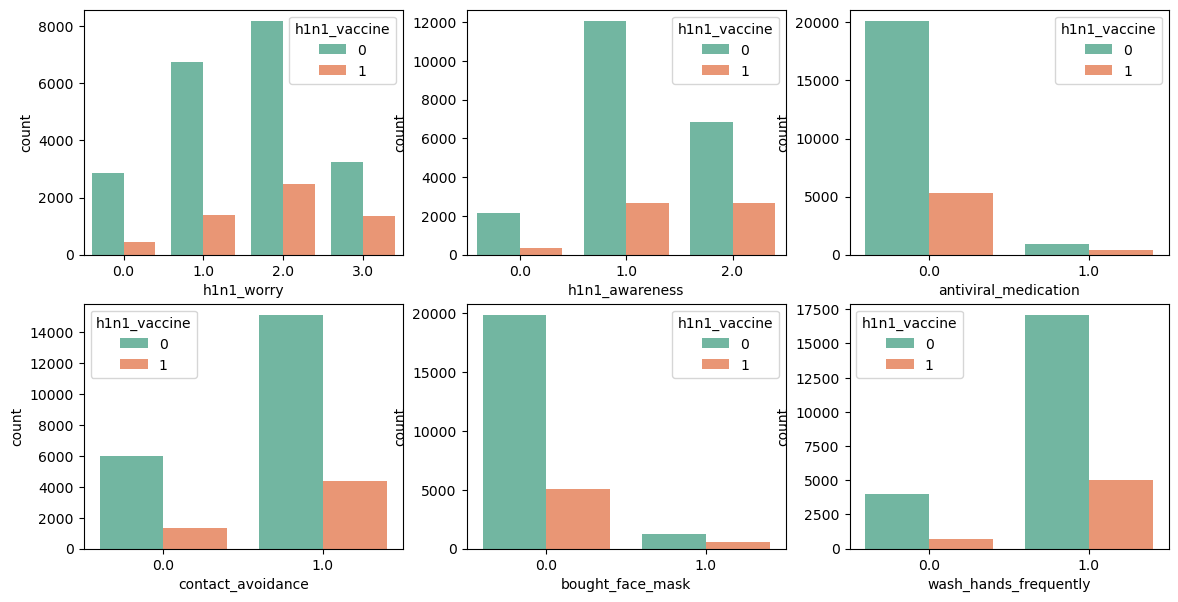

In [22]:
fig, ax = plt.subplots(2,3, figsize=(14,7))
sns.countplot(x='h1n1_worry',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0][0])
sns.countplot(x='h1n1_awareness',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0][1])
sns.countplot(x='antiviral_medication',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0][2])
sns.countplot(x='contact_avoidance',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1][0])
sns.countplot(x='bought_face_mask',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1][1])
sns.countplot(x='wash_hands_frequently',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1][2])

<Axes: xlabel='antiviral_medication', ylabel='count'>

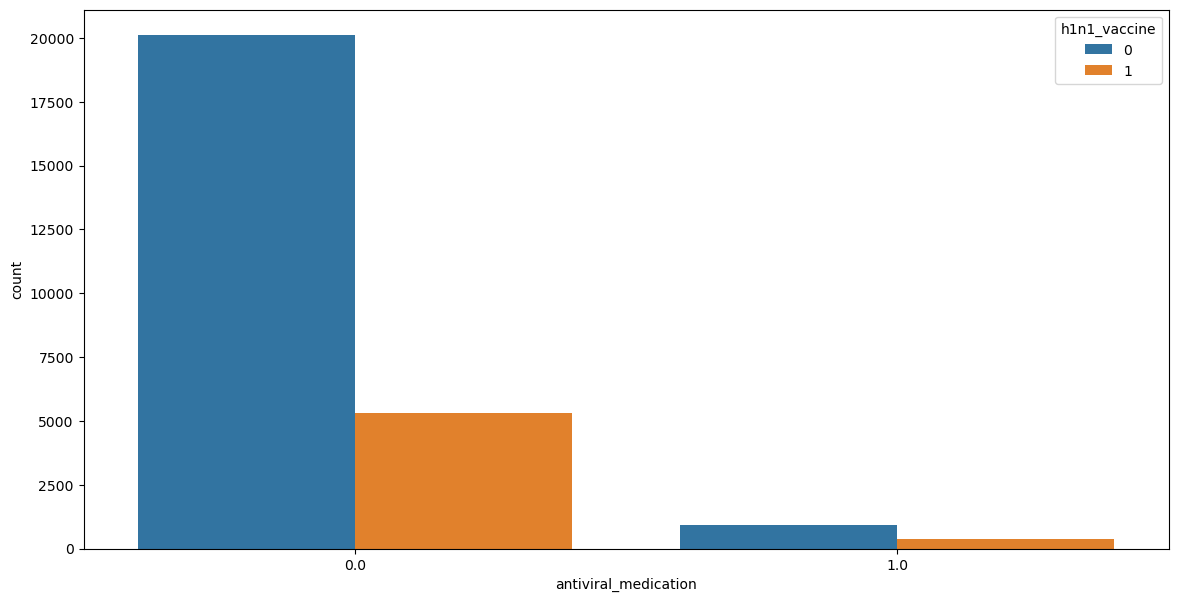

In [35]:
plt.figure(figsize=(14,7))
sns.countplot(x='antiviral_medication',hue='h1n1_vaccine',data=data)

**from above insight we can say that that antiviral medication than vaccination is also done but some people are not taking antiviral medicine or not taking vaccine**

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                      feature        VIF
0                   unique_id   3.839009
1                  h1n1_worry   6.145005
2              h1n1_awareness   5.860432
3        antiviral_medication   1.116972
4           contact_avoidance   4.589099
5            bought_face_mask   1.166179
6       wash_hands_frequently   7.322985
7      avoid_large_gatherings   2.492349
8   reduced_outside_home_cont   2.426575
9            avoid_touch_face   4.058870
10          dr_recc_h1n1_vacc   2.306371
11      dr_recc_seasonal_vacc   2.448001
12    chronic_medic_condition   1.534472
13    cont_child_undr_6_mnths   1.120990
14           is_health_worker   1.262997
15           has_health_insur  13.709153
16     is_h1n1_vacc_effective  20.520089
17              is_h1n1_risky   7.613762
18        sick_from_h1n1_vacc   6.071340
19     is_seas_vacc_effective  20.616176
20              is_seas_risky   8.225161
21        sick_from_seas_vacc   4.640738
22                age_bracket   4.998252
23              

In [23]:
x=data.drop(columns=['h1n1_vaccine'])
y=data['h1n1_vaccine']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=log_reg.predict(x_test)

In [29]:
print("Accuracy Score",accuracy_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))
print("AUC Score",roc_auc_score(y_test,y_pred))

Accuracy Score 0.8066496929758874
F1 score 0.33074131674442714
AUC Score 0.5946448840549644


Text(120.72222222222221, 0.5, 'Truth')

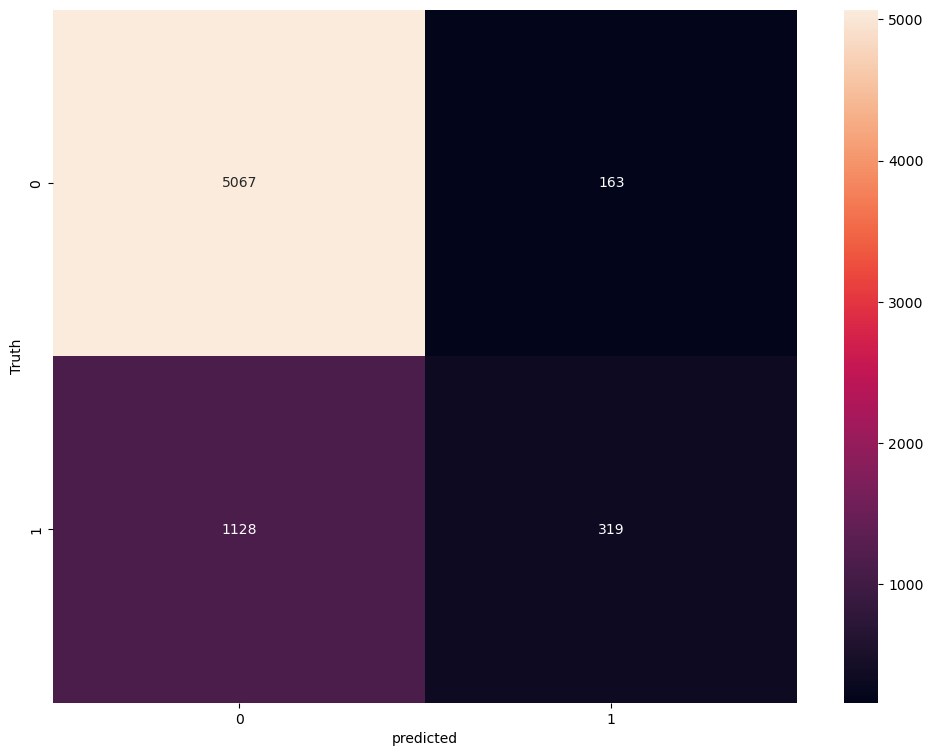

In [30]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

# Balancing data using SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=23)
x_sm,y_sm=sm.fit_resample(x,y)

In [39]:
y_sm.value_counts()

0    21033
1    21033
Name: h1n1_vaccine, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.25 ,random_state=23)

In [42]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
pred=model.predict(X_test)

In [44]:
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("F1-Score: ",f1_score(y_test, pred))
print("AUC Score: ",roc_auc_score(y_test, pred))

Accuracy Score:  0.7753161547969953
F1-Score:  0.7765907157038858
AUC Score:  0.7754129147701035


**Conclusion**
**The logistic regression model we have developed exhibits promising performance metrics. With an accuracy score of approximately 0.7, the model demonstrates a strong ability to correctly classify instances, indicating its overall effectiveness in making predictions.**